First, import all necessary libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils import to_categorical, plot_model
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D

Then, load the training and testing datasets.

training input shape (50000, 1, 28, 28)
training validation shape (10000, 1, 28, 28)
test input shape (10000, 1, 28, 28)


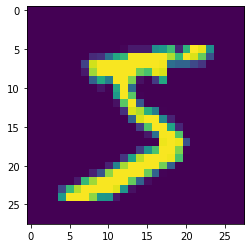

In [0]:
# Load dataset
(X_train,Y_train), (X_test, Y_test) = mnist.load_data()
# Create suitable x and y
X_train = X_train.astype('float32')
X_train = np.reshape(X_train,(X_train.shape[0],1,X_train.shape[1],X_train.shape[2]))
X_test = X_test.astype('float32')
X_test = np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1],X_test.shape[2]))
Y_train = to_categorical(Y_train,10)
Y_test = to_categorical(Y_test,10)

# Split training set in training and validation set
X_validation = X_train[50000::,...]
Y_validation = Y_train[50000::,...]
X_train = X_train[:50000:,...]
Y_train = Y_train[:50000:,...]

print("training input shape",X_train.shape)
print("training validation shape",X_validation.shape)
print("test input shape",X_test.shape)

# Display first image of the training set
plt.imshow(X_train[0,0])

Create the Convolutional Neural Network using the Keras library from TensorFlow.

In [0]:
width = 28
height = 28
input_shape = (1, height, width)
# Input data normalization
X_train /= 255
X_test /= 255

# Import model from keras
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=input_shape, data_format='channels_first'))
model.add(MaxPooling2D(pool_size=(2,2), data_format='channels_first'))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu', data_format='channels_first'))
model.add(MaxPooling2D(pool_size=(2,2), data_format='channels_first'))
model.add(Dropout(rate=0.2))
model.add(Flatten(data_format='channels_first'))
model.add(Dense(128,activation='relu',use_bias=True))
model.add(Dense(128,activation='relu',use_bias=True))
model.add(Dense(10,activation='softmax',use_bias=True))


Train the model.

In [0]:
# Compile the model
model.compile(optimizer='Adam',loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])
# Summary of the model 
model.summary()
# Fit/Train the model
history = model.fit(x=X_train,y=Y_train,batch_size=128,epochs=10,verbose=1,validation_data=(X_validation, Y_validation))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 26, 26)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 13, 13)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 11, 11)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 5, 5)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 64, 5, 5)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

Visualize the training of the model. This give us an overvieuw of the training and validation loss and accuracy in function of the training epochs.

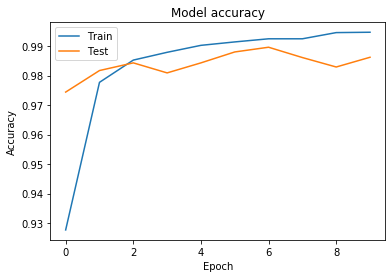

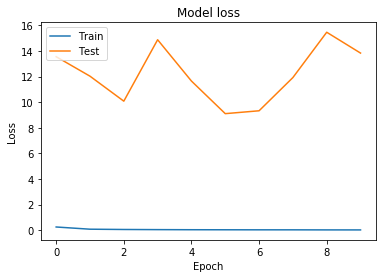

In [0]:
# make a plot of the model
plot_model(model, to_file='model_keras_mnist.png')

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Evaluate the model for the validation set.

In [0]:
# Obtain value for loss error and accuracy of themodel 
error, accuracy = model.evaluate(X_validation, Y_validation, verbose=0)

Lets examine how good the trained model performs on a unseen dataset during training.

In [0]:
# Make a prediction over unseen dataset
result = model.predict(X_test)

In [0]:
pred = np.max(result,axis=1)[:,np.newaxis] == result # Obtain index of the most probable digit
cond = np.where(pred==True)[1] == np.where(Y_test==True)[1]
accuracy = 100*np.sum(cond)/Y_test.shape[0]
print("The accuracy on a unseen data set during the training is {}%".format(accuracy))

The accuracy on a unseen data set during the training is 99.27%
